In [1]:
using Plots, DataFrames, StatsPlots 
using Random, LinearAlgebra, Statistics, CSV
pyplot()

Plots.PyPlotBackend()

In [24]:
# load data
crime = CSV.read("crime.csv"; copycols=true)

# show(crime, allcols=true)

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate
,String,Int64,Int64,Int64,Float64,Int64,Float64
1,Albany,2015,308613,8224,2664.8,1005,325.7
2,Albany,2014,308166,9157,2971.5,995,322.9
3,Albany,2013,306300,9455,3086.8,1002,327.1
4,Albany,2012,305204,9971,3267.0,1012,331.6
5,Albany,2011,305571,10725,3509.8,1163,380.6
6,Albany,2010,295267,11036,3737.6,1182,400.3
7,Albany,2009,298400,10613,3556.6,1289,432.0
8,Albany,2008,299789,10750,3585.9,1356,452.3
9,Albany,2007,297154,10584,3561.8,1468,494.0


First, let's see what the data look like.

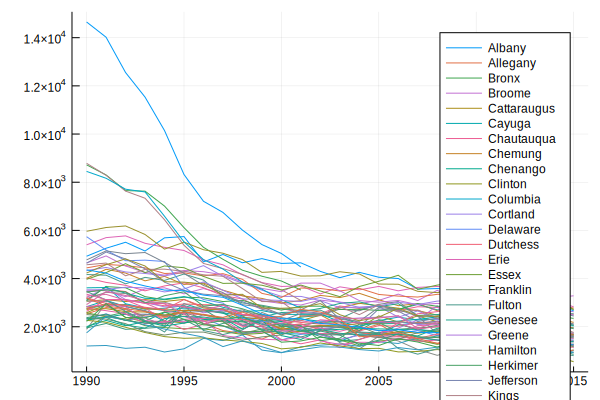

In [25]:
@df crime plot(:Year, :Index_Rate, group=:County)

Looks like some counties didn't report their data every year - especially, the large ones.

# DataFrames tools

* filter
* group by
* sort

In [31]:
# Filter: select rows where Index_Count > 1e5 
big_crime = crime[crime.Index_Count .> 1e5, :]
big_crime = filter(row -> row.Index_Count > 1e5, crime)

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate
,String,Int64,Int64,Int64,Float64,Int64,Float64
1,Bronx,1991,1205404,100071,8301.9,33515,2780.4
2,Bronx,1990,1200900,104729,8720.9,33635,2800.8
3,Kings,1997,2298630,101454,4413.7,32697,1422.5
4,Kings,1996,2304633,106659,4628.0,34798,1509.9
5,Kings,1995,2298337,123733,5383.6,39887,1735.5
6,Kings,1994,2303574,148398,6442.1,48212,2092.9
7,Kings,1993,2307039,169236,7335.6,54931,2381.0
8,Kings,1992,2315780,176699,7630.2,56682,2447.6
9,Kings,1991,2307907,191259,8287.1,60814,2635.0


In [30]:
crime.Index_Count .> 1e4

1542-element BitArray{1}:
 0
 0
 0
 0
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [34]:
# group by: aggregate the big_crime table by :County
#           show the sum of :Index_Count for each county (aggregated over all years)
total_by_county = by(crime, :County, :Index_Count => sum)

# another example:
# max_by_county = by(crime, :County, :Index_Count => maximum)

,County,Index_Count_sum
,String,Int64
1,Albany,330658
2,Allegany,24650
3,Bronx,866699
4,Broome,172473
5,Cattaraugus,56003
6,Cayuga,50734
7,Chautauqua,109771
8,Chemung,76361
9,Chenango,29584


In [35]:
# sort: order by decreasing crime levels 
total_by_county = sort(total_by_county, :Index_Count_sum, rev=true)

,County,Index_Count_sum
,String,Int64
1,New York,1592996
2,Kings,1568790
3,Queens,1313261
4,Suffolk,1029428
5,Erie,1000934
6,Bronx,866699
7,Monroe,819781
8,Nassau,684654
9,Westchester,583215


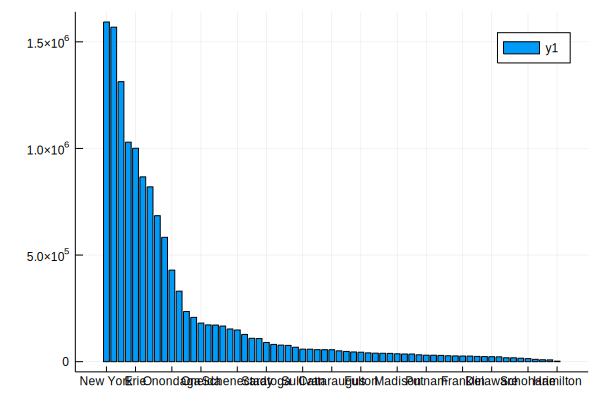

In [36]:
@df total_by_county bar(:County, :Index_Count_sum)

# Quiz: 

    1. how can I find the 2012 population for each county?
    2. how can I find the maximum population for each county and the year when the maximum was achieved?

In [12]:
crime[crime.Year .== 2012, 1:3]

,County,Year,Population
,String,Int64,Int64
1,Albany,2012,305204
2,Allegany,2012,49041
3,Broome,2012,200105
4,Cattaraugus,2012,78364
5,Cayuga,2012,80168
6,Chautauqua,2012,135093
7,Chemung,2012,89320
8,Chenango,2012,50389
9,Clinton,2012,82387


In [13]:
max_population = by(crime, :County, :Population => maximum)
lookup_max_population = Dict(zip(max_population.County, max_population.Population_maximum))
filter(row -> row.Population == lookup_max_population[row.County], crime[:, 1:3])

,County,Year,Population
,String,Int64,Int64
1,Albany,2015,308613
2,Allegany,2000,52720
3,Bronx,2001,1315775
4,Broome,1992,213668
5,Cattaraugus,2000,88097
6,Cayuga,1994,94356
7,Chautauqua,2000,143321
8,Chemung,1992,95869
9,Chenango,2000,52877


# Let's figure out which counties didn't report their data in all years

In [39]:
# Count the number of reports per county 
#  1. group by :County, creating new column N_reports equal to the number of Countys
#  2. sort by the number of reports (decreasing)
reports_by_county = sort(by(crime, :County, N_reports = :County => length), :N_reports)  

,County,N_reports
,String,Int64
1,Bronx,12
2,Kings,12
3,New York,12
4,Queens,12
5,Richmond,12
6,Albany,26
7,Allegany,26
8,Broome,26
9,Cattaraugus,26


In [40]:
reporting_counties = reports_by_county.County[reports_by_county.N_reports .== 26]
nonreporting_counties = reports_by_county.County[reports_by_county.N_reports .< 26]

5-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Bronx"   
 "Kings"   
 "New York"
 "Queens"  
 "Richmond"

In [38]:
# St. Lawrence is a typo! Fix it.
# (then run prev two cells again)
crime[crime.County .== "St Lawrence", :County] = "St. Lawrence"

"St. Lawrence"

In [17]:
# btw, we could build the same information directly, without fancy syntax 
counties = unique(crime[:County])
reporting_counties = String[]
nonreporting_counties = String[]

for county in counties
    if length(crime[crime[:County].==county,:County]) == 26
        push!(reporting_counties, county)
    else
        push!(nonreporting_counties, county)
    end
end
nonreporting_counties

5-element Array{String,1}:
 "Bronx"   
 "Kings"   
 "New York"
 "Queens"  
 "Richmond"

Let's delete data from the counties that didn't always report it.

In [41]:
crime = filter(row -> row.County in reporting_counties, crime)

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate
,String,Int64,Int64,Int64,Float64,Int64,Float64
1,Albany,2015,308613,8224,2664.8,1005,325.7
2,Albany,2014,308166,9157,2971.5,995,322.9
3,Albany,2013,306300,9455,3086.8,1002,327.1
4,Albany,2012,305204,9971,3267.0,1012,331.6
5,Albany,2011,305571,10725,3509.8,1163,380.6
6,Albany,2010,295267,11036,3737.6,1182,400.3
7,Albany,2009,298400,10613,3556.6,1289,432.0
8,Albany,2008,299789,10750,3585.9,1356,452.3
9,Albany,2007,297154,10584,3561.8,1468,494.0


Let's see what this cleaner data set looks like.

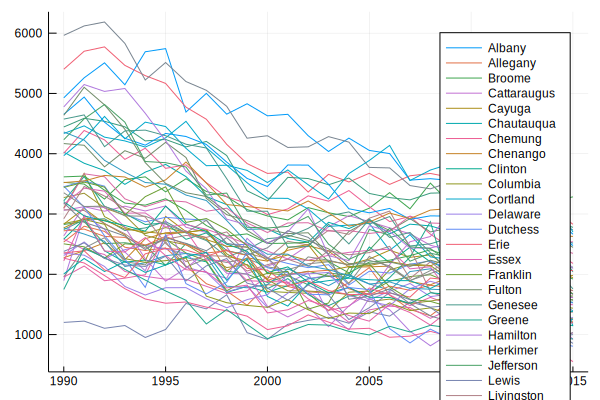

In [42]:
@df crime plot(:Year, :Index_Rate, group=:County)

In [20]:
# plot(crime,x=:Year,y=:Index_Count,color=:County,Geom.bar, Coord.cartesian(xmin=1990, xmax=2015, ymin=0, ymax=5e5))

In [43]:
# just Tompkins county
tompkins = crime[crime[:County].=="Tompkins",:]

,County,Year,Population,Index_Count,Index_Rate,Violent_Count,Violent_Rate
,String,Int64,Int64,Int64,Float64,Int64,Float64
1,Tompkins,2015,105240,2206,2096.2,140,133.0
2,Tompkins,2014,104271,2603,2496.4,103,98.8
3,Tompkins,2013,102977,2902,2818.1,109,105.8
4,Tompkins,2012,102272,2746,2685.0,116,113.4
5,Tompkins,2011,102020,2388,2340.7,90,88.2
6,Tompkins,2010,101158,2505,2476.3,120,118.6
7,Tompkins,2009,101616,2558,2517.3,153,150.6
8,Tompkins,2008,101591,2475,2436.2,137,134.9
9,Tompkins,2007,100687,2452,2435.3,116,115.2


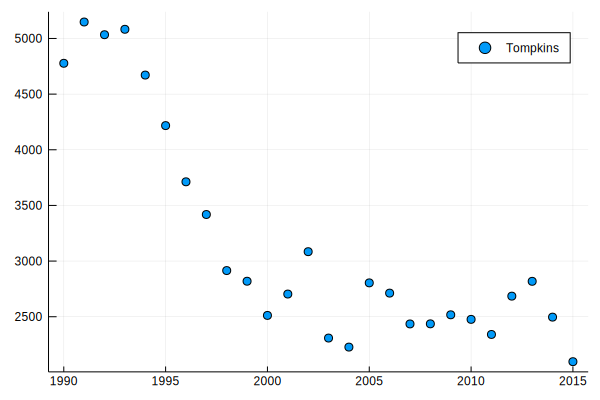

In [44]:
@df tompkins scatter(:Year, :Index_Rate, group=:County)